In [1]:
#installing tensorflow
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
#installing keras
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


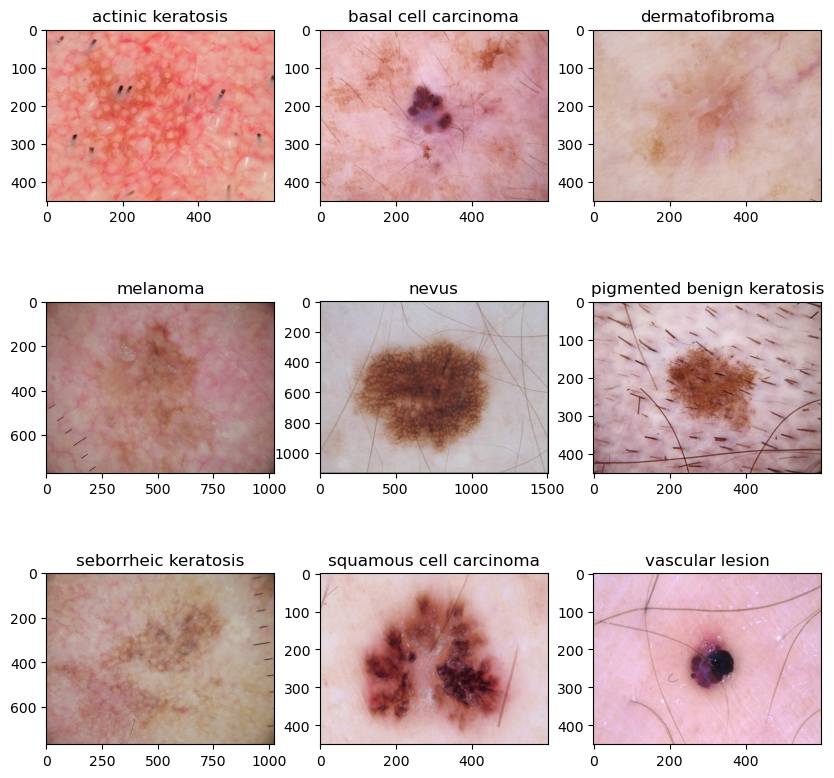

In [10]:
#training or validation data to visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling
num_classes = 9
model = Sequential([layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [22]:
#choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
#View the summary of all layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 180, 180, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 180, 180, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 90, 90, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 45, 45, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 22, 22, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │        69,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,129 (1.06 MB)

 Trainable params: 277,129 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.1768 - loss: 2.0772 - val_accuracy: 0.2058 - val_loss: 2.0400
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.2164 - loss: 2.0229 - val_accuracy: 0.2058 - val_loss: 2.0585
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.1881 - loss: 2.0585 - val_accuracy: 0.2260 - val_loss: 1.9966
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.2342 - loss: 1.9981 - val_accuracy: 0.2327 - val_loss: 2.0090
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.2298 - loss: 1.9965 - val_accuracy: 0.2886 - val_loss: 1.9198
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.2651 - loss: 1.9617 - val_accuracy: 0.2617 - val_loss: 1.9813
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.2870 - loss: 1.9366 - val_accuracy: 0.3177 - val_loss: 1.8839
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.3453 - loss: 1.8578 - val_accuracy: 0.3110 - val_loss: 1.843

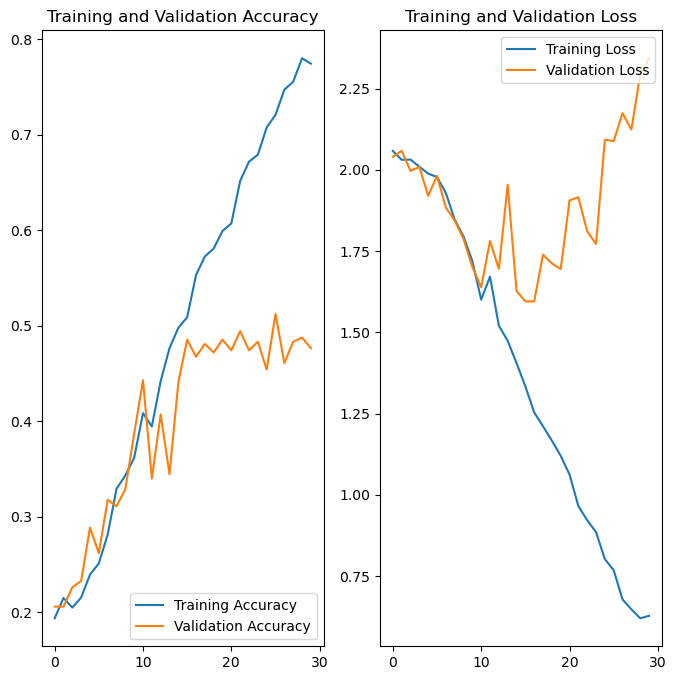

In [26]:
#Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
#After we analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augument = keras.Sequential([
                             layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.RandomRotation(0.2, fill_mode='reflect'),
                             layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

2024-10-23 19:42:53.230718: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


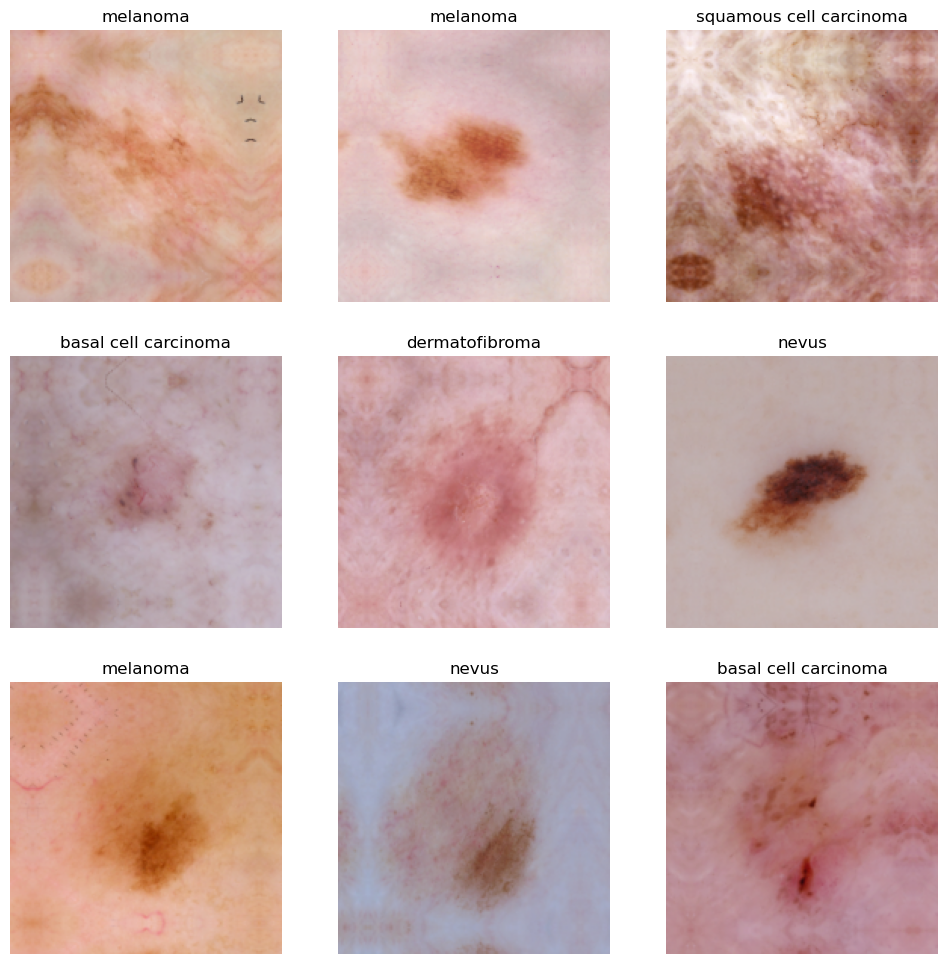

In [29]:
#Visualize how our augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [30]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



In [31]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.1902 - loss: 2.1566 - val_accuracy: 0.2438 - val_loss: 2.0295
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.2080 - loss: 2.0361 - val_accuracy: 0.2058 - val_loss: 2.0207
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.2187 - loss: 2.0118 - val_accuracy: 0.2081 - val_loss: 2.0580
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.2368 - loss: 2.0206 - val_accuracy: 0.2886 - val_loss: 1.9974
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.2562 - loss: 1.9613 - val_accuracy: 0.2998 - val_loss: 1.8882
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.2718 - loss: 1.8596 - val_accuracy: 0.2371 - val_loss: 1.9005
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.2904 - loss: 1.8485 - val_accuracy: 0.3579 - val_loss: 1.7339
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.3608 - loss: 1.7264 - val_accuracy: 0.3736 - v

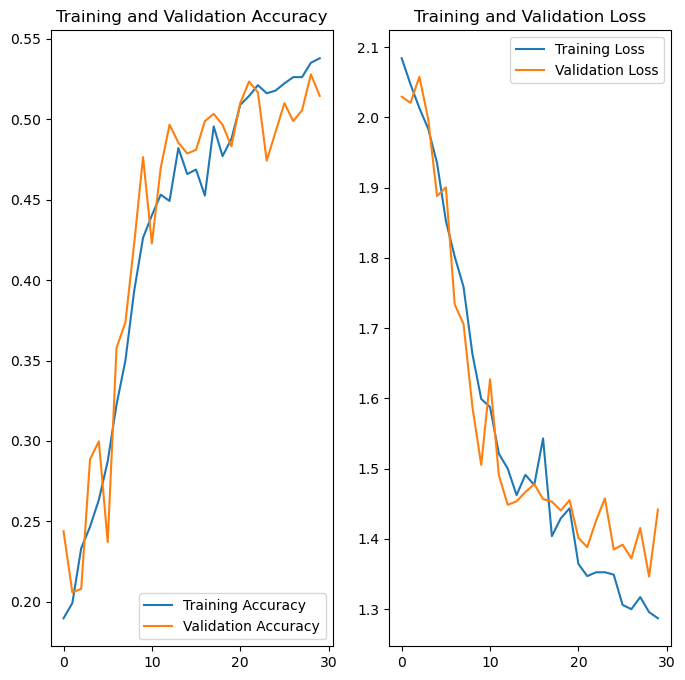

In [33]:
#Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<BarContainer object of 9 artists>

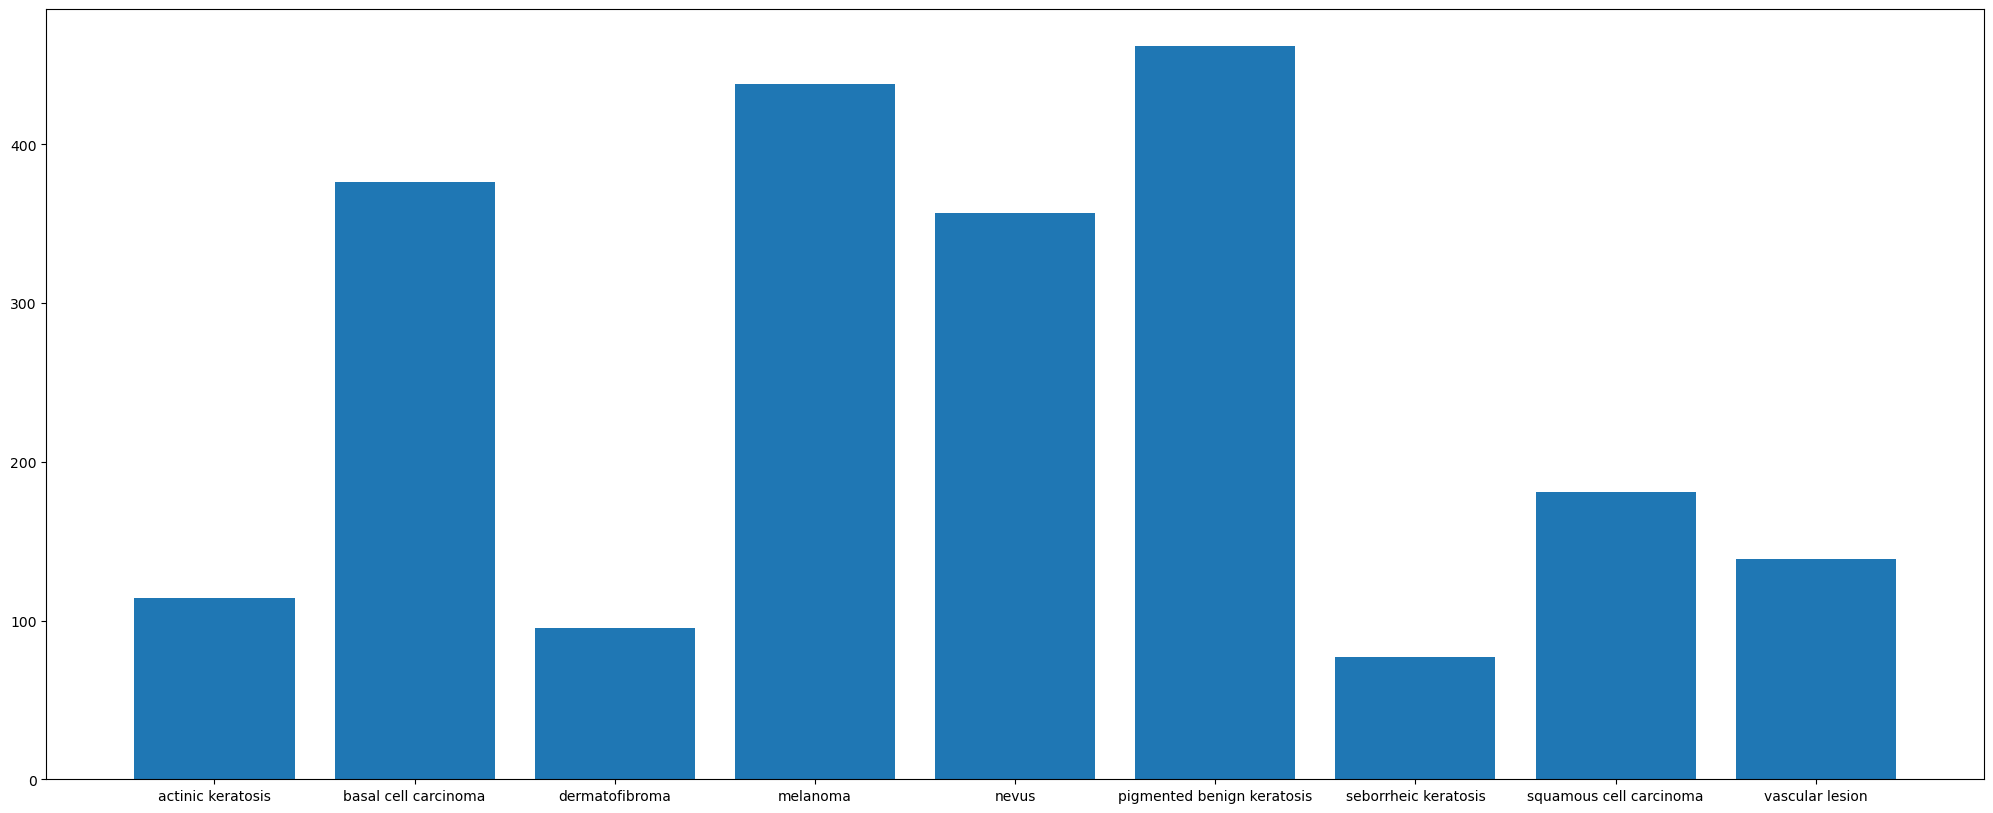

In [34]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [35]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [36]:
!pip install Augmentor

In [38]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x34171D6D0>: 100%|█|


Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x340278590>: 100%|█|


Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x340653A90>: 100%|█|


Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1028x753 at 0x34067EAD0>: 100%|█


Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3


Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3406A7D10>: 100%|█|


Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x340254C50>: 100%|█


Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3417E8F90>: 100%|█|


Initialised with 2239 image(s) found.
Output directory set to /Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2126x2185 at 0x3404FD9D0>: 100%|


In [39]:
data_dir_train1 = pathlib.Path("/Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)


4500


In [65]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/Users/apple/Desktop/UpGrad Assignments/Skin c...,actinic keratosis
1,/Users/apple/Desktop/UpGrad Assignments/Skin c...,actinic keratosis
2,/Users/apple/Desktop/UpGrad Assignments/Skin c...,actinic keratosis
3,/Users/apple/Desktop/UpGrad Assignments/Skin c...,actinic keratosis
4,/Users/apple/Desktop/UpGrad Assignments/Skin c...,actinic keratosis
...,...,...
2234,/Users/apple/Desktop/UpGrad Assignments/Skin c...,vascular lesion
2235,/Users/apple/Desktop/UpGrad Assignments/Skin c...,vascular lesion
2236,/Users/apple/Desktop/UpGrad Assignments/Skin c...,vascular lesion
2237,/Users/apple/Desktop/UpGrad Assignments/Skin c...,vascular lesion


In [66]:
#Distribution of augmented data after adding new images to the original training data.
new_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [67]:
#Train the model on the data created using Augmentor
batch_size = 32
img_height = 180
img_width = 180

In [69]:
import pathlib
data_dir_train1=pathlib.Path("/Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")

In [70]:
data_dir_train1

PosixPath('/Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

In [71]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [72]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


In [73]:
#Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


In [62]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [75]:
data_dir_train1=pathlib.Path("/Users/apple/Desktop/UpGrad Assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [76]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [77]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
epochs =30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


113/113 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.2608 - loss: 1.9486 - val_accuracy: 0.3656 - val_loss: 1.7118
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.3889 - loss: 1.6308 - val_accuracy: 0.4378 - val_loss: 1.5279
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.4712 - loss: 1.4434 - val_accuracy: 0.4667 - val_loss: 1.5271
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.4919 - loss: 1.3924 - val_accuracy: 0.5211 - val_loss: 1.4490
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.5332 - loss: 1.3357 - val_accuracy: 0.4944 - val_loss: 1.4087
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.5521 - loss: 1.2605 - val_accuracy: 0.5389 - val_loss: 1.3506
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.5467 - loss: 1.2450 - val_accuracy: 0.5533 - val_loss: 1.2339
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.6336 - loss: 1.0342 - val_accuracy: 0.561

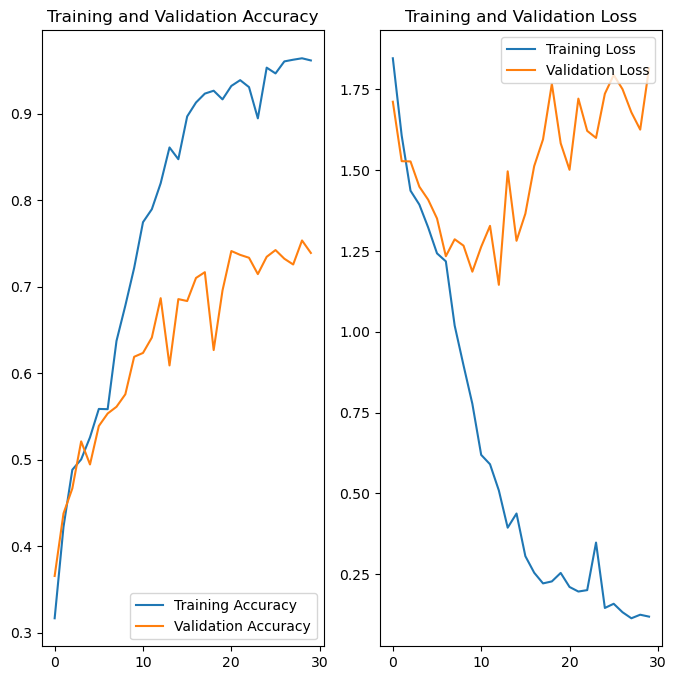

In [80]:
#Visualize the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()